# Perceptron Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [7]:
def gen_perceptron_data(M, w_hat, b_hat):
    """ 
    Hyperplane: 
        xw = b 
        wo*x0 + w1*x1 - b = 0
        x1 = (b - wo*x0)/w1  <- Generate data here from w,b
    """
    x0 = 10 * (np.random.uniform(size=M) - 0.5)
    x1 = (b_hat - w_hat[0, 0] * x0) / w_hat[0, 1]
    x1_median = np.median(x1)
    x1 = x1_median + 10 * (np.random.uniform(size=M) - 0.5)
    y = np.where(x1 >= (b_hat - w_hat[0, 0] * x0) / w_hat[0, 1], 1., -1.)
    return np.stack((x0, x1, y), axis=1)

In [8]:
M = 50 # num data points
w_hat = np.array([[1, 1]])
b_hat = 0.0
D = gen_perceptron_data(M, w_hat, b_hat)
x0 = np.linspace(min(D[:, 0]), max(D[:, 0]))
x1_hat = (b_hat - w_hat[0, 0] * x0) / w_hat[0, 1]
x0_rng = [min(x0) - 5., max(x0) + 5.]
x1_rng = [min(x1_hat) - 5., max(x1_hat) + 5.]

In [9]:
from IPython.display import clear_output

def plot_hyperplane(w, b):
    clear_output()
    plt.scatter(D[:, 0], D[:, 1], c=D[:, 2])
    x1 = (b - w[0, 0] * x0) / w[0, 1]
    plt.plot(x0, x1, 'g--', label='current');
    plt.plot(x0, x1_hat, 'r--', label='opt');
    plt.xlim(*x0_rng)
    plt.ylim(*x1_rng)
    plt.show();

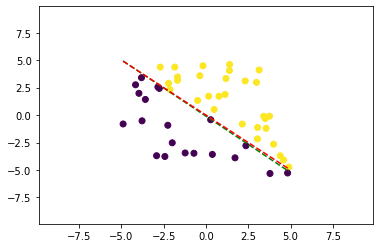

In [10]:
w = np.zeros(shape=[1,2])
b = 0.0
lr = 0.25
plot_hyperplane(w, b)
plt.pause(1.0)
while True:
    c = 0
    for point in D:
        y = point[-1]
        x = np.array([point[:2]])
        if y * (x.dot(w.T) + b) <= 0.:
            c += 1
            w = w + lr * (y * x)
            b = b + lr * y
            plot_hyperplane(w, b)
            plt.pause(0.5)
    if not c:
        break

In [11]:
print(w_hat, w)
print(b_hat, b)

[[1 1]] [[2.59559259 2.529583  ]]
0.0 -0.25
